In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from sympy import *
import scipy.fftpack
from scipy import stats
import random
from scipy.signal import hilbert
from scipy import interpolate

from mpl_toolkits.mplot3d import Axes3D


---
# VIDEO: Singular value decomposition
---


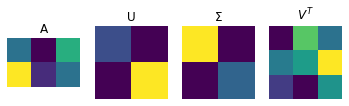

In [2]:

# the matrix
A = [ [3,0,5], [8,1,3] ]

U,S,V = np.linalg.svd(A)

plt.subplot(141)
plt.imshow(A)
plt.title('A')
plt.axis('off')

plt.subplot(142)
plt.imshow(U)
plt.title('U')
plt.axis('off')

plt.subplot(143)
plt.imshow(np.diag(S))
plt.title('$\Sigma$')
plt.axis('off')

plt.subplot(144)
plt.imshow(V.T)
plt.title('$V^T$')
plt.axis('off')

plt.show()

In [3]:
S

array([9.89086518, 3.18916698])

# What is the relationship between eig and SVD for a square sumetric matrix



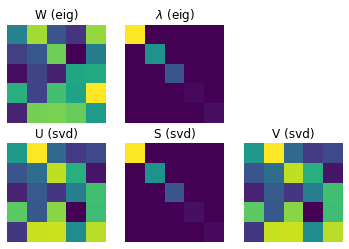

In [4]:
# create a symetric matrix (5x5)
# eig (W, L)
# SVD

# Images of all matrices
# compare U and V and between U and W

A = np.random.randn(5, 5)
A = np.transpose(A) @ A

L, W = np.linalg.eig(A)
Lsort = np.sort(L)
L = np.diag(L)
Lsort = np.diag(Lsort)

U, S, V = np.linalg.svd(A)
S = np.diag(S)
V = np.transpose(V)

plt.subplot(231)
plt.imshow(W)
plt.title('W (eig)')
plt.axis('off')


plt.subplot(232)
plt.imshow(L)
plt.title('$\lambda$ (eig)')
plt.axis('off')

plt.subplot(234)
plt.imshow(U)
plt.title('U (svd)')
plt.axis('off')

plt.subplot(235)
plt.imshow(S)
plt.title('S (svd)')
plt.axis('off')

plt.subplot(236)
plt.imshow(V)
plt.title('V (svd)')
plt.axis('off')
plt.show()

In [5]:
Lsort

array([[ 0.42061621,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.73996435,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  4.5881421 ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  8.92408481,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        , 17.34575929]])

In [6]:
S

array([[17.34575929,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  8.92408481,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  4.5881421 ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.73996435,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.42061621]])

# U from from eigendecomposition A^TA

SVD:

$A = U \sum V^T$

$A^TA = V \sum^2 V^T$

$Av_{i} = u_{i}\sigma_{i}$

$u_{i} = Av_{i}/\sigma_{i}$

In [7]:
# create a matrix (3x6)

# Full svd (variables Us, Ss, Vs)

# eig of A'A (variables V, L)

# confirm that V = Vs

# check the relationship between Ss and L

# create U using only A, V, and L

# confirm U = Us

m = 3
n = 6

A = np.random.randn(m,n)

Us, Ss, Vs = np.linalg.svd(A)
Ss = np.diag(Ss)

AtA = np.transpose(A) @ A

Lv, Vunsorted = np.linalg.eig(AtA)

#import pandas as pd
idx = np.argsort(Lv)[::-1]
L = Lv[idx]
L = np.diag(L)
V = Vunsorted[:,idx]
Vs = np.transpose(Vs)
print(Vs)
print(V)

print('Columns to the right are different in eig ' +
      'and svd because an orthogonal was chosen as the basis that was different' +
     ' for svd and eig')

print(np.diag(L[0:m, 0:m]))
print(np.diag(Ss))
print('L and Ss are different because for eig A was transformed with A^T')
print(np.diag(L[0:m, 0:m]))
print(np.diag(Ss)**2)

U = np.zeros((m,m))
for i in range(m):
    U[:,i] = A @ V[:,i]/np.sqrt(L[i,i].real)

[[-0.17666265 -0.47906347 -0.18597768 -0.4208337  -0.45222398  0.56841294]
 [-0.39663228 -0.60485123  0.10031785 -0.27088854  0.36940451 -0.50688644]
 [ 0.24905619 -0.29571412  0.34520023  0.26026318 -0.69739425 -0.42102887]
 [-0.42459698 -0.26026554 -0.26750291  0.80584228  0.02148133  0.17486627]
 [-0.30612532  0.06513104  0.86798137  0.0655084   0.09505569  0.3678677 ]
 [ 0.68952799 -0.49520312  0.10599988  0.1676554   0.40395298  0.27713301]]
[[ 0.17666265+0.j          0.47906347+0.j          0.18597768+0.j
   0.11571007+0.19234862j  0.11571007-0.19234862j  0.83946459+0.j        ]
 [ 0.39663228+0.j          0.60485123+0.j         -0.10031785+0.j
  -0.06101966-0.47910346j -0.06101966+0.47910346j -0.40642019+0.j        ]
 [-0.24905619+0.j          0.29571412+0.j         -0.34520023+0.j
   0.51365331+0.j          0.51365331-0.j         -0.03986752+0.j        ]
 [ 0.42459698+0.j          0.26026554+0.j          0.26750291+0.j
  -0.09002145+0.48628468j -0.09002145-0.48628468j -0.2971462

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:48: ComplexWarning: Casting complex values to real discards the imaginary part


In [8]:
U

array([[ 0.91718638,  0.33540991, -0.21510307],
       [-0.13927663,  0.77565063,  0.61560386],
       [-0.37332447,  0.53466465, -0.75813096]])

In [9]:
Us

array([[-0.91718638, -0.33540991,  0.21510307],
       [ 0.13927663, -0.77565063, -0.61560386],
       [ 0.37332447, -0.53466465,  0.75813096]])

# A^TA, Av, and singular vectors

Assumptions:

1) $u$ is a _left_ singular vector of $A^TA$

2) $\sigma$ is the corresponding singular value

Claim:

1) $Av$ is a _right_ singular vector of $AA^T$

2) $\sigma$ is the corresponding singular value

Proof:

$A^TAv = u\sigma$

$A^TAv = v\sigma$

$AA^TAv = Av\sigma$

$w = Av$

$AA^Tw = w\sigma$

In [27]:
m = 4

A = np.random.randn(m,m)
AtA = np.transpose(A) @ A

AAt = A @ np.transpose(A)


U, S, V = np.linalg.svd(AtA)
S = np.diag(S)
V = np.transpose(V)

diffs = np.zeros((m,1))
for i in range(m):
    diffs[i] = sum(((AAt @ A @ U[:,i]) - (A @ U[:, i] * S[i, i]))**2)

In [28]:
diffs

array([[1.02551918e-29],
       [4.63455782e-30],
       [3.14681545e-29],
       [2.59711653e-30]])


---
# VIDEO: Spectral theory of matrices
---


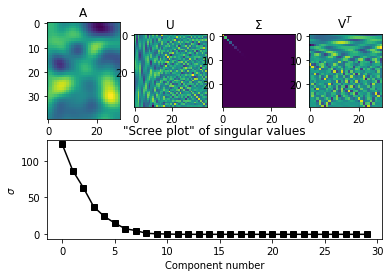

In [29]:
# matrix sizes
m = 40
n = 30

# define a 2D Gaussian for smoothing
k = int( (m+n)/4 )
xx = np.linspace(-3,3,k)
[X,Y] = np.meshgrid(xx,xx)
g2d = np.exp(-(X**2 + Y**2) / (k/8))

# matrix
A = scipy.signal.convolve2d(np.random.randn(m,n),g2d,'same')

# SVD (note that V comes out transposed, which is different from MATLAB behavior)
U,S,V = np.linalg.svd(A)


# show the constituent matrices
plt.subplot(241)
plt.imshow(A)
plt.title('A')

plt.subplot(242)
plt.imshow(U)
plt.title('U')

plt.subplot(243)
plt.imshow(np.diag(S))
plt.title('$\Sigma$')

plt.subplot(244)
plt.imshow(V)
plt.title('V$^T$')

plt.subplot(212)
plt.plot(S,'ks-')
plt.xlabel('Component number')
plt.ylabel('$\sigma$')
plt.title('"Scree plot" of singular values')

plt.show()


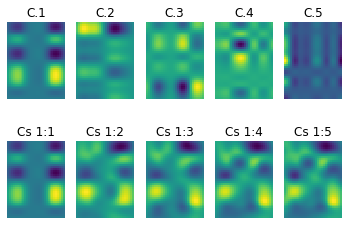

In [30]:
rank1mats = np.zeros((5,m,n))

for i in range(0,5):
    
    # create rank1 matrix
    rank1mats[i,:,:] = np.outer( U[:,i]*S[i],V[i,:] )
    
    plt.subplot2grid((2,5),(0,i))
    plt.imshow(rank1mats[i,:,:])
    plt.axis('off')
    plt.title('C.%d' %(i+1))
    
    plt.subplot2grid((2,5),(1,i))
    imdat = np.sum(rank1mats[:i+1,:,:],axis=0)
    plt.imshow(imdat)
    plt.axis('off')
    plt.title('Cs 1:%d' %(i+1))

plt.show()


---
# VIDEO: SVD for low-rank approximations
---


rank = 5


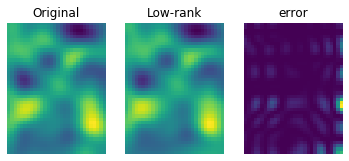

In [31]:

# number of components (singular "layers") to keep
nComps = 5

# reduced vectors
Ur = U[:,0:nComps]
Sr = S[0:nComps]
Vr = V[0:nComps,:]

# low-rank apporoximation
reconImage = Ur@np.diag(Sr)@Vr

# rank (confirm same as nComps)
print( 'rank =',np.linalg.matrix_rank(reconImage) )

# error map and percent difference from original matrix
errormap = (reconImage-A)**2
pctdiff  = 100*np.linalg.norm(reconImage-A)/np.linalg.norm(A)

# show the results!
plt.subplot(131)
plt.imshow(A)
plt.axis('off')
plt.title('Original')

plt.subplot(132)
plt.imshow(reconImage)
plt.axis('off')
plt.title('Low-rank')

plt.subplot(133)
plt.imshow(errormap)
plt.axis('off')
plt.title('error')
plt.show()
   


---
# VIDEO: Convert singular values to percent variance
---


<IPython.core.display.Javascript object>


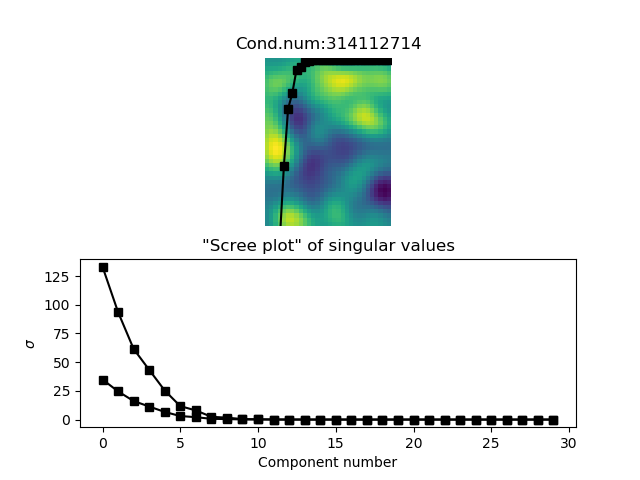

In [20]:

# matrix sizes
m = 40
n = 30

# define a 2D Gaussian for smoothing
k = int( (m+n)/4 )
xx = np.linspace(-3,3,k)
[X,Y] = np.meshgrid(xx,xx)
g2d = np.exp(-(X**2 + Y**2) / (k/8))

# matrix
A = scipy.signal.convolve2d(np.random.randn(m,n),g2d,'same')

# SVD
U,s,V = np.linalg.svd(A)

# convert to percent variance
spct = 100*s/np.sum(s)

# plot the singular values for comparison
plt.subplot(211)
plt.plot(s,'ks-')
plt.xlabel('Component number')
plt.ylabel('$\sigma$')
plt.title('Raw singular values')

plt.subplot(212)
plt.plot(spct,'ks-')
plt.xlabel('Component number')
plt.ylabel('$\sigma$ (% of total)')
plt.title('Percent-change-normalized singular values')
plt.show()

# When UV^T is valid, what is its norm and orthogonal

In [17]:
# generate a matrix such that U*V' is valid
# norm of U, norm of V, and the norm of U*V'
# U*U', V*V', U*V'

A = np.random.randn(5,5)
U, S, V = np.linalg.svd(A)
V = np.transpose(V)

# Composite pure rotation matrices
# normalized to unit length
np.linalg.norm(U, 2)
np.linalg.norm(np.transpose(V), 2)
np.linalg.norm(U@np.transpose(V), 2)
# Identity matrix
U @ np.transpose(U)
V @ np.transpose(V)
# Not the identity matrix
C = U @ np.transpose(V)
np.linalg.norm(C, 2)

1.0000000000000004


---
# VIDEO: SVD, matrix inverse, and pseudoinverse
---


In [18]:

# the matrix
A = [ [1,2,3],
      [1,2,4], # hint: change 2->0 for invertible matrix to test
      [1,2,5]  ]
  
# SVD
U,S,V = np.linalg.svd(A)

# pseudoinvert S
nonzeroels = S>10**-14 # find nonzero elements (>rounding errors)
S[nonzeroels] = 1/S[nonzeroels] # invert only those elements

# now pseudoinvert A (note that python produces V^T, hence V.T below is actually V)
Ai = V.T@np.diag(S)@U.T

# it's sortof close to I...?
print( Ai@A )

# compute with pinv function
print( np.linalg.pinv(A)@A )


[[ 2.00000000e-01  4.00000000e-01  0.00000000e+00]
 [ 4.00000000e-01  8.00000000e-01  0.00000000e+00]
 [-5.55111512e-17 -1.11022302e-16  1.00000000e+00]]
[[ 2.00000000e-01  4.00000000e-01  0.00000000e+00]
 [ 4.00000000e-01  8.00000000e-01  0.00000000e+00]
 [-5.55111512e-17 -1.11022302e-16  1.00000000e+00]]



---
# VIDEO: Condition number of a matrix
---


<IPython.core.display.Javascript object>


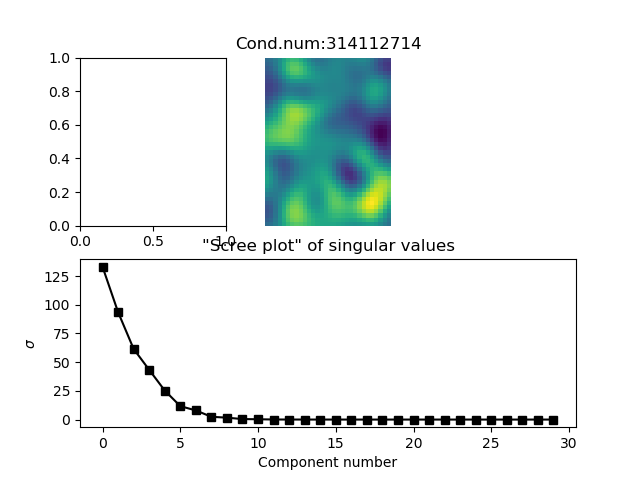

In [22]:

# matrix sizes
m = 40

# define a 2D Gaussian for smoothing
k = int( (m+n)/4 )
xx = np.linspace(-3,3,k)
[X,Y] = np.meshgrid(xx,xx)
g2d = np.exp(-(X**2 + Y**2) / (k/8))

# matrix
A = np.random.randn(m,m)
A = scipy.signal.convolve2d(np.random.randn(m,n),g2d,'same')



# SVD
U,S,V = np.linalg.svd(A)

# compute condition number
condnum = s[0]/s[-1]

plt.close()
# show the matrix
plt.subplot(211)
plt.imshow(A)
plt.axis('off')
plt.title('Cond.num:%d' %condnum)

plt.subplot(212)
plt.plot(s,'ks-')
plt.xlabel('Component number')
plt.ylabel('$\sigma$')
plt.title('"Scree plot" of singular values')

plt.show()

<IPython.core.display.Javascript object>


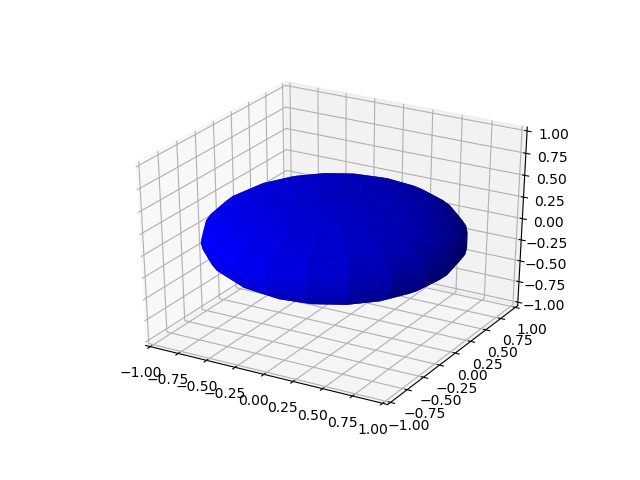

In [23]:
## sphere

# the transformation matrix T
T = np.eye(3)
T[-1,-1] = .5


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Make data
n = 21
u = np.linspace(0, 2*np.pi,n)
v = np.linspace(0, np.pi,n)
x = np.outer(np.cos(u), np.sin(v))
y = np.outer(np.sin(u), np.sin(v))
z = np.outer(np.ones(np.size(u)), np.cos(v))

# put coords in a matrix to be transformed
M = np.concatenate( (np.reshape(x,(n*n,1)),np.reshape(y,(n*n,1)),np.reshape(z,(n*n,1))) ,axis=1)

# apply the transformation matrix to the coordinates
TM = T@M.T

# get out the new coordinates
xp = np.reshape(TM[0,:],(n,n))
yp = np.reshape(TM[1,:],(n,n))
zp = np.reshape(TM[2,:],(n,n))

# Plot the surface
ax.plot_surface(xp,yp,zp, color='b')
ax.set_xlim3d(-1,1)
ax.set_ylim3d(-1,1)
ax.set_zlim3d(-1,1)

plt.show()

# Create a random matrix with a specified condition number

42.0


<IPython.core.display.Javascript object>


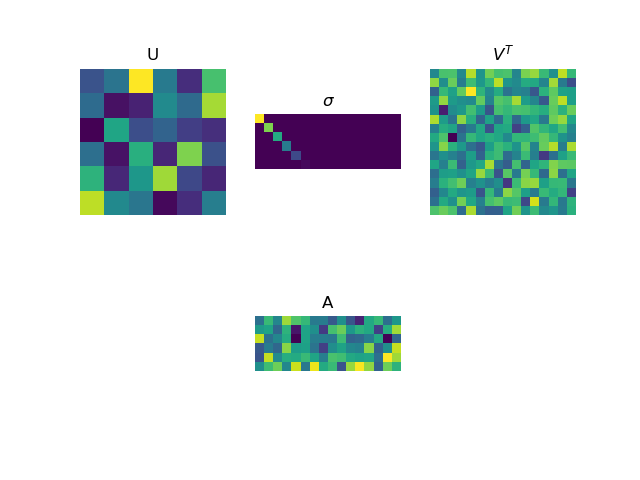

Text(0.5, 1.0, 'A')

In [39]:
# create a random matrix with a specified condition number
m = 6
n = 16
#m = 6
condnum = 42

U, junk = np.linalg.qr(np.random.randn(m,m))

V, junk = np.linalg.qr(np.random.randn(n,n))


# create signular values matrix
s = np.linspace(condnum, 1, min(m,n))
S = np.zeros((m,n))
for i in range(len(s)):
    S[i, i] = s[i]

A = U @ S @ np.transpose(V)
print(np.linalg.cond(A))


plt.close()
# show the matrix
plt.subplot(231)
plt.imshow(U)
plt.axis('off')
plt.title('U')

plt.subplot(232)
plt.imshow(S)
plt.axis('off')
plt.title('$\sigma$')

plt.subplot(233)
plt.imshow(np.transpose(V))
plt.axis('off')
plt.title('$V^T$')

plt.subplot(235)
plt.imshow(A)
plt.axis('off')
plt.title('A')
